### Aim: Implementation of KNN Algorithm

**KNN Algorithm**

K-nearest neighbors (KNN) is a popular supervised machine learning algorithm used for both classification and regression tasks. It is a non-parametric method that makes predictions based on the similarity (distance) between the input data and the training examples. In other words, KNN determines the class or value of a new data point by looking at the k nearest neighbors in the training set.

Here's how the KNN algorithm works:

Data Preparation: First, you need a labeled training dataset. Each training example consists of a set of features (attributes) and a corresponding class or value. The features should be numeric or transformed into numeric values.

Choosing the Value of k: You need to choose a value for k, which represents the number of nearest neighbors to consider when making a prediction. The value of k should be a positive integer. Selecting the right value of k is crucial and can impact the algorithm's performance.

Calculating Distance: The distance between data points is typically calculated using Euclidean distance, although other distance metrics like Manhattan distance can be used as well. Euclidean distance measures the straight-line distance between two points in a multidimensional space.

Finding the k Nearest Neighbors: For a new data point, the algorithm calculates the distance to all points in the training set and selects the k nearest neighbors based on the distance metric chosen.

Voting (Classification) or Averaging (Regression): For classification problems, the class of the new data point is determined by majority voting among its k nearest neighbors. Each neighbor's vote carries equal weight. For regression problems, the predicted value for the new data point is calculated as the average of the values of its k nearest neighbors.

Prediction: After determining the class or value based on voting or averaging, the algorithm assigns the predicted class or value to the new data point.

Evaluation: The algorithm's performance is evaluated using evaluation metrics appropriate for the task at hand, such as accuracy, precision, recall, F1 score, or mean squared error, depending on whether it is a classification or regression problem.

It's worth noting that KNN is a lazy learning algorithm, meaning it does not build an explicit model during the training phase. Instead, it stores the training data to make predictions at runtime based on the similarity with new data points. This can make KNN slower when dealing with large datasets or high-dimensional feature spaces.

Additionally, KNN requires careful selection of features, appropriate normalization of data, and handling of missing values to ensure accurate predictions. Feature scaling can be crucial since the algorithm relies on distances between data points.

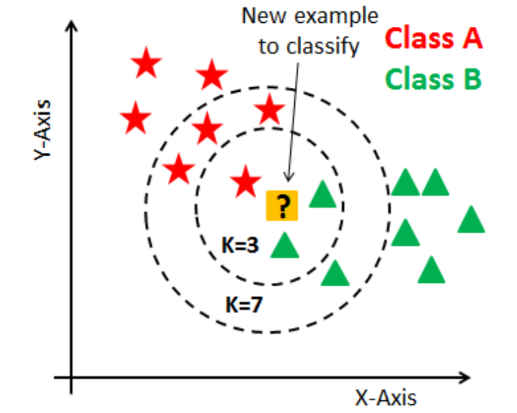

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing datasets
sunny_data_set= pd.read_csv("/content/User_Data.csv")
sunny_data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#Extracting Independent & Dependent Variable
x = sunny_data_set.iloc[:,[2,3]].values

In [4]:
y = sunny_data_set.iloc[:,4].values

In [5]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [6]:
#Feature scaling
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)   
x_test= st_x.transform(x_test)  

By executing the above code, our dataset is imported to our program and well pre-processed.

Fitting K-NN classifier to the Training data:

Now we will fit the K-NN classifier to the training data. To do this we will
import the KNeighborsClassifier class of Sklearn Neighbors library. After
importing the class, we will create the Classifier object of the class. The
Parameter of this class will be

o n_neighbors: To define the required neighbors of the algorithm.
Usually, it takes 5.

o metric=&#39;minkowski&#39;: This is the default parameter and it decides the
distance between the points.

o p=2: It is equivalent to the standard Euclidean metric.

And then we will fit the classifier to the training data. Below is the code for it:

In [7]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [8]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

Creating the Confusion Matrix:

Now we will create the Confusion Matrix for our K-NN model to see the
accuracy of the classifier. Below is the code for it:

In [9]:
#Creating the confusion matrix
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[64,  4],
       [ 3, 29]])

Visualizing the Training set result:

Now, we will visualize the training set result for K-NN model. The code will
remain same as we did in Logistic Regression, except the name of the graph.
Below is the code for it:

<ipython-input-10-be7798160f36>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


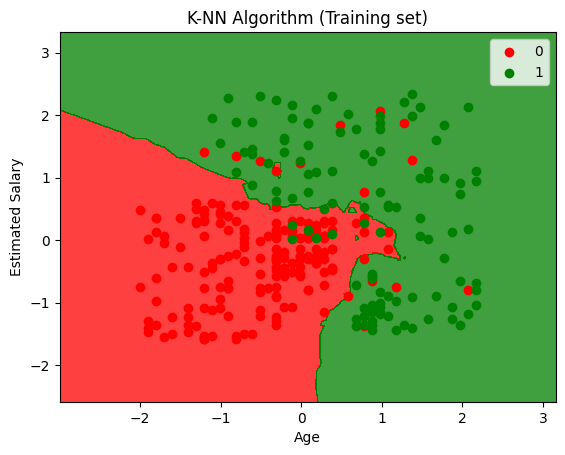

In [10]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('K-NN Algorithm (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

The output graph is different from the graph which we have occurred in Logistic Regression. It can be understood in the below points:

As we can see the graph is showing the red point and green points. The green points are for Purchased(1) and Red Points for not Purchased(0) variable.

The graph is showing an irregular boundary instead of showing any straight line or any curve because it is a K-NN algorithm, i.e., finding the nearest neighbor.

The graph has classified users in the correct categories as most of the users who didn't buy the SUV are in the red region and users who bought the SUV are in the green region.

The graph is showing good result but still, there are some green points in the red region and red points in the green region. But this is no big issue as by doing this model is prevented from overfitting issues.
Hence our model is well trained.

Visualizing the Test set result:

After the training of the model, we will now test the result by putting a new
dataset, i.e., Test dataset. Code remains the same except some minor
changes: such as x_train and y_train will be replaced by x_test and y_test.
Below is the code for it:

<ipython-input-11-da7a7c6066dc>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


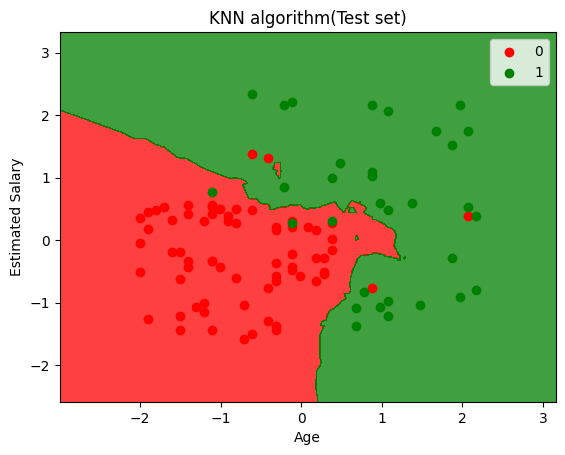

In [11]:
#Visualizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('KNN algorithm(Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

The above graph is showing the output for the test data set. As we can see in the graph, the predicted output is well good as most of the red points are in the red region and most of the green points are in the green region.
However, there are few green points in the red region and a few red points in the green region. So these are the incorrect observations that we have observed in the confusion matrix(7 Incorrect output).

Conclusions: we have successfully implemented & learnt KNN algorithm in this practical successfully.